# EDA de correlaciones y estacionalidad (1er. acercamiento previo al proceso de ML)

### Paso 0: Importar las librerias necesarias:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Paso 1: ETL de los datasets:

Para el estudio general de las correlaciones, se uso una muestra de taxis verdes de los años 2022 y 2023. Esto con el fin de trabajar con una muestra pequeña que involucre todos los meses, dias y horas, y al menos 2 años diferentes. Ya mas adelante se realizará un EDA mas profundo con todo el dataset ya transformado.

In [2]:
green_sample_2022 = pd.read_csv('../2022_Green_Taxi_Trip_Data_20241224.csv')
green_sample_2023 = pd.read_csv('../2023_Green_Taxi_Trip_Data_20241224.csv')

In [3]:
green_sample_2022.head(3)

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance
0,01/01/2022 12:14:21 AM,01/01/2022 12:15:33 AM,42,42,0.44
1,01/01/2022 12:20:55 AM,01/01/2022 12:29:38 AM,116,41,2.10
2,01/01/2022 12:57:02 AM,01/01/2022 01:13:14 AM,41,140,3.70


In [4]:
green_sample_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840402 entries, 0 to 840401
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   lpep_pickup_datetime   840402 non-null  object 
 1   lpep_dropoff_datetime  840402 non-null  object 
 2   PULocationID           840402 non-null  int64  
 3   DOLocationID           840402 non-null  int64  
 4   trip_distance          840402 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 32.1+ MB


In [5]:
green_sample_2023.head(3)

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance
0,01/01/2023 12:26:10 AM,01/01/2023 12:37:11 AM,166,143,2.58
1,01/01/2023 12:51:03 AM,01/01/2023 12:57:49 AM,24,43,1.81
2,01/01/2023 12:35:12 AM,01/01/2023 12:41:32 AM,223,179,0.00


In [6]:
green_sample_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787060 entries, 0 to 787059
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   lpep_pickup_datetime   787060 non-null  object 
 1   lpep_dropoff_datetime  787060 non-null  object 
 2   PULocationID           787060 non-null  int64  
 3   DOLocationID           787060 non-null  int64  
 4   trip_distance          787060 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 30.0+ MB


Lo primero que se hara es un unico dataset con todos los valores juntos. Como el nombre de las columnas son los mismos, una simple concatenacion servira.

In [7]:
green_sample_22_23 = pd.concat([green_sample_2022,green_sample_2023])\
                        .sort_values(by=['lpep_pickup_datetime'],ignore_index=True)

green_sample_22_23

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance
0,01/01/2009 02:07:04 AM,01/01/2009 02:20:20 AM,75,237,1.66
1,01/01/2009 06:57:41 AM,01/01/2009 07:22:45 AM,260,263,5.72
2,01/01/2009 08:21:27 PM,01/02/2009 11:07:31 AM,65,178,7.72
3,01/01/2009 12:02:17 AM,01/01/2009 12:02:21 AM,74,74,0.00
4,01/01/2009 12:02:32 AM,01/01/2009 02:31:35 PM,174,240,0.80
...,...,...,...,...,...
1627457,12/31/2023 12:56:42 PM,12/31/2023 01:00:18 PM,74,75,0.90
1627458,12/31/2023 12:57:05 PM,12/31/2023 01:02:36 PM,92,173,1.49
1627459,12/31/2023 12:57:16 PM,12/31/2023 01:00:52 PM,166,166,0.51
1627460,12/31/2023 12:58:26 PM,12/31/2023 01:08:08 PM,75,163,2.40


Aqui se observa unos valores que no corresponden con los años esperados.

* Primero se cambiara el tipo de dato de las fechas y horas to `datetime` para un mejor manejo de esta columna.

* Luego se revisara y eliminaran las filas que no deberian estar en este dataset.

In [8]:
green_sample_22_23['lpep_dropoff_datetime']=pd.to_datetime(green_sample_22_23['lpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
green_sample_22_23['lpep_pickup_datetime']=pd.to_datetime(green_sample_22_23['lpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

green_sample_22_23

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance
0,2009-01-01 02:07:04,2009-01-01 02:20:20,75,237,1.66
1,2009-01-01 06:57:41,2009-01-01 07:22:45,260,263,5.72
2,2009-01-01 20:21:27,2009-01-02 11:07:31,65,178,7.72
3,2009-01-01 00:02:17,2009-01-01 00:02:21,74,74,0.00
4,2009-01-01 00:02:32,2009-01-01 14:31:35,174,240,0.80
...,...,...,...,...,...
1627457,2023-12-31 12:56:42,2023-12-31 13:00:18,74,75,0.90
1627458,2023-12-31 12:57:05,2023-12-31 13:02:36,92,173,1.49
1627459,2023-12-31 12:57:16,2023-12-31 13:00:52,166,166,0.51
1627460,2023-12-31 12:58:26,2023-12-31 13:08:08,75,163,2.40


In [9]:
green_sample_22_23['lpep_pickup_datetime'].dt.year.unique()

array([2009, 2022, 2023, 2008, 2021])

Se eliminaran todos las filas cuyos años no sean 2022 y 2023

In [10]:
green_sample_22_23 = green_sample_22_23[green_sample_22_23['lpep_pickup_datetime'].dt.year.isin([2022,2023])].copy()\
                    .reset_index(drop=True)

green_sample_22_23

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance
0,2022-01-01 01:00:19,2022-01-01 01:04:52,95,95,0.87
1,2022-01-01 01:00:24,2022-01-01 01:09:50,159,74,1.85
2,2022-01-01 13:00:43,2022-01-01 13:14:10,74,24,2.04
3,2022-01-01 13:01:00,2022-01-01 13:22:00,14,210,10.20
4,2022-01-01 01:01:15,2022-01-01 01:09:48,80,80,1.60
...,...,...,...,...,...
1627442,2023-12-31 12:56:42,2023-12-31 13:00:18,74,75,0.90
1627443,2023-12-31 12:57:05,2023-12-31 13:02:36,92,173,1.49
1627444,2023-12-31 12:57:16,2023-12-31 13:00:52,166,166,0.51
1627445,2023-12-31 12:58:26,2023-12-31 13:08:08,75,163,2.40


### Paso 2: Filtrado de los datos:

A continuación evaluaremos este dataset unificado.

In [11]:
green_sample_22_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627447 entries, 0 to 1627446
Data columns (total 5 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   lpep_pickup_datetime   1627447 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  1627447 non-null  datetime64[ns]
 2   PULocationID           1627447 non-null  int64         
 3   DOLocationID           1627447 non-null  int64         
 4   trip_distance          1627447 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 62.1 MB


El dataset no posee valores nulos.

A continuacion se hara el siguiente filtrado, para eliminar filas erroneas que puedieran parecer correctas:

* Calcular tiempo de viaje (`lpep_dropoff_datetime` - `lpep_pickup_datetime`).
* Eliminar tiempos y distancias 0 y negativas.

In [12]:
antes = green_sample_22_23.shape[0]

In [13]:
# Calculo del tiempo
green_sample_22_23['trip_time'] = green_sample_22_23['lpep_dropoff_datetime']-green_sample_22_23['lpep_pickup_datetime']

# Filtrado por distancias y tiempo
green_sample_22_23 = green_sample_22_23[(green_sample_22_23['trip_time']>pd.Timedelta(0))&(green_sample_22_23['trip_distance']>0)].copy()


In [14]:
despues = green_sample_22_23.shape[0]

print(f'Del dataset original con {antes} filas, se eliminaron {antes-despues} filas')

Del dataset original con 1627447 filas, se eliminaron 89195 filas


* Con tiempos y distancias positivas crear una nueva columna calculando velocidad promedio.
* Mantener filas cuyas velocidades sean razonables (Valor a establecer, en este EDA se usara un minimo de 1 mph y un maximo 65 mph que es la maxima velocidad permitida en NYC).

In [15]:
green_sample_22_23['avg_speed'] = green_sample_22_23['trip_distance']/(green_sample_22_23['trip_time']/pd.Timedelta(hours=1))

green_sample_22_23['avg_speed'].describe()

count    1.538252e+06
mean     2.185359e+02
std      1.416019e+04
min      4.182010e-04
25%      8.460829e+00
50%      1.062162e+01
75%      1.391304e+01
max      8.390735e+06
Name: avg_speed, dtype: float64

In [16]:
green_sample_22_23 = green_sample_22_23[(green_sample_22_23['avg_speed']>=1)&(green_sample_22_23['avg_speed']<=65)].copy()

speed_filter = green_sample_22_23.shape[0]
print(f'Con este filtro se eliminaron {despues-speed_filter} filas')

Con este filtro se eliminaron 15201 filas


Hecho esto, ahora de la columnas datetime extraeremos todos los valores por separado:
* Dia
* Mes
* Hora
* Dia de la semana
* Año

Como el producto ML tiene como proposito predecir la demanda, se trabajara solo con los pickup_times.

In [17]:
green_sample_22_23['PU_dia']=green_sample_22_23['lpep_pickup_datetime'].dt.day
green_sample_22_23['PU_mes']=green_sample_22_23['lpep_pickup_datetime'].dt.month
green_sample_22_23['PU_hora']=green_sample_22_23['lpep_pickup_datetime'].dt.hour
green_sample_22_23['PU_dia_semana']=green_sample_22_23['lpep_pickup_datetime'].dt.weekday
green_sample_22_23['PU_año']=green_sample_22_23['lpep_pickup_datetime'].dt.year

### A continuacion se creara un dataset donde se agruparan el numero total (count) de viajes por hora durante los 2 años.

In [18]:
trip_counts = green_sample_22_23.groupby(['PU_año', 'PU_mes','PU_dia','PU_hora','PU_dia_semana',])\
                                .agg(Count=('PU_hora','count'))\
                                .reset_index()

trip_counts

,PU_año,PU_mes,PU_dia,PU_hora,PU_dia_semana,Count
0,2022,1,1,0,5,72
1,2022,1,1,1,5,70
2,2022,1,1,2,5,62
3,2022,1,1,3,5,40
4,2022,1,1,4,5,21
...,...,...,...,...,...,...
17511,2023,12,31,19,6,91
17512,2023,12,31,20,6,80
17513,2023,12,31,21,6,83
17514,2023,12,31,22,6,68


### Para un periodo de 2 años, deberia haber 17520 filas/horas distintas, y se ve que faltan 4 en este dataset lo que significa que **hay 4 horas durante este periodo de 2 años donde hubo 0 (cero) viajes, lo cual es algo a considerar al entrenar el modelo, añadir esos valores cero faltantes**

### Primero veremos algunas distribuciones basicas de acuerdo al año, mes, dia, hora, dia de la semana:

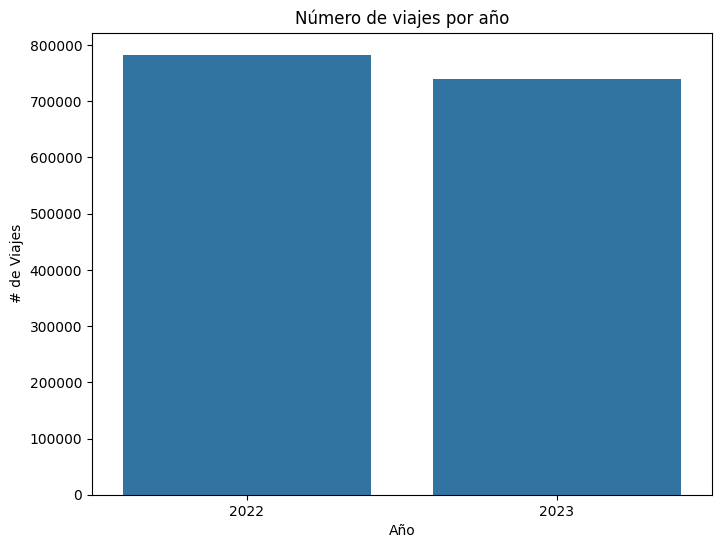

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(data=green_sample_22_23,x='PU_año',order=[2022,2023])
plt.title('Número de viajes por año') 
plt.xlabel('Año')
plt.ylabel('# de Viajes')
plt.show()

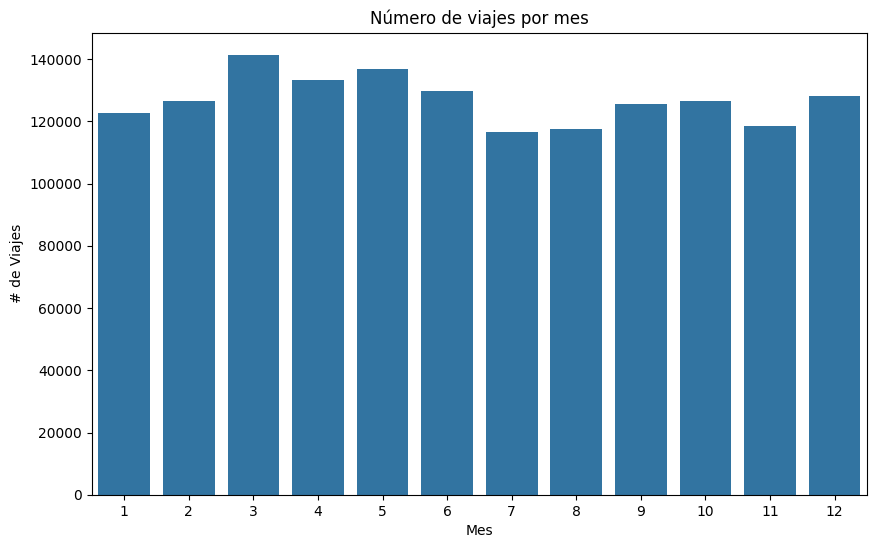

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data=green_sample_22_23,x='PU_mes')
plt.title('Número de viajes por mes') 
plt.xlabel('Mes')
plt.ylabel('# de Viajes')
plt.show()

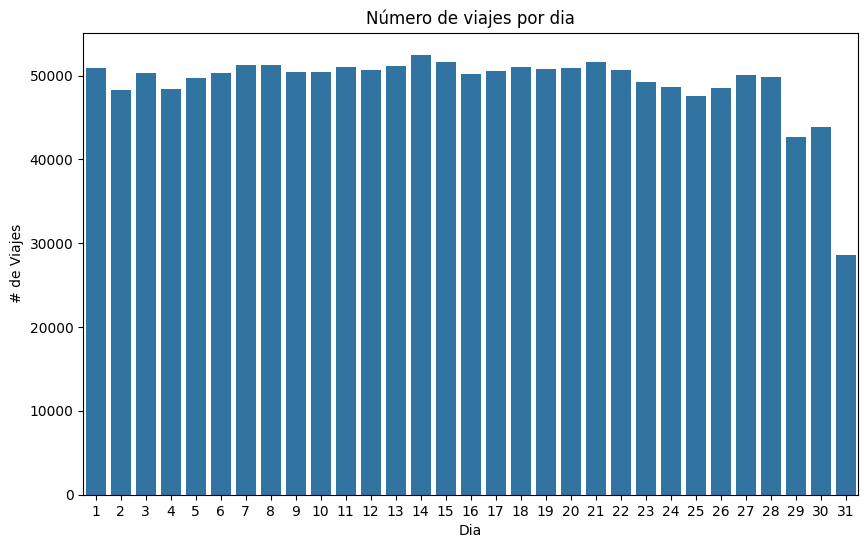

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data=green_sample_22_23,x='PU_dia')
plt.title('Número de viajes por dia') 
plt.xlabel('Dia')
plt.ylabel('# de Viajes')
plt.show()

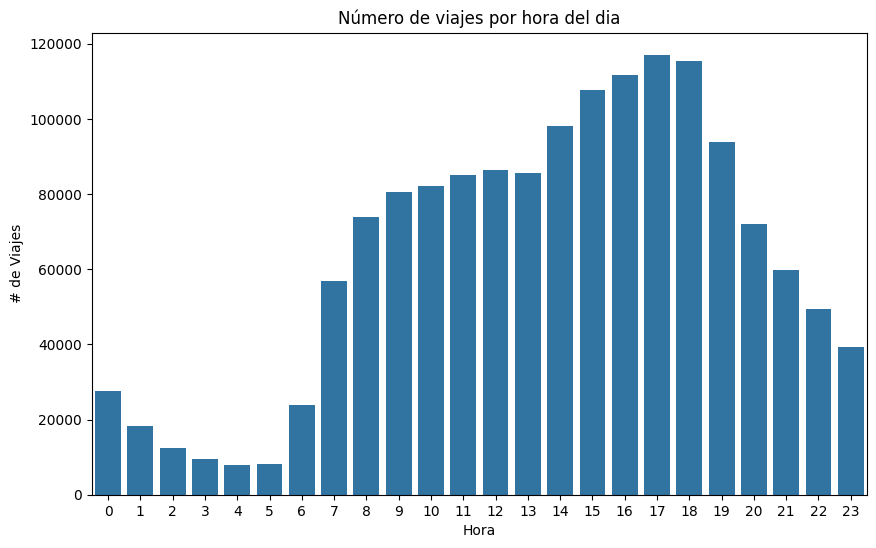

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=green_sample_22_23,x='PU_hora')
plt.title('Número de viajes por hora del dia') 
plt.xlabel('Hora')
plt.ylabel('# de Viajes')
plt.show()

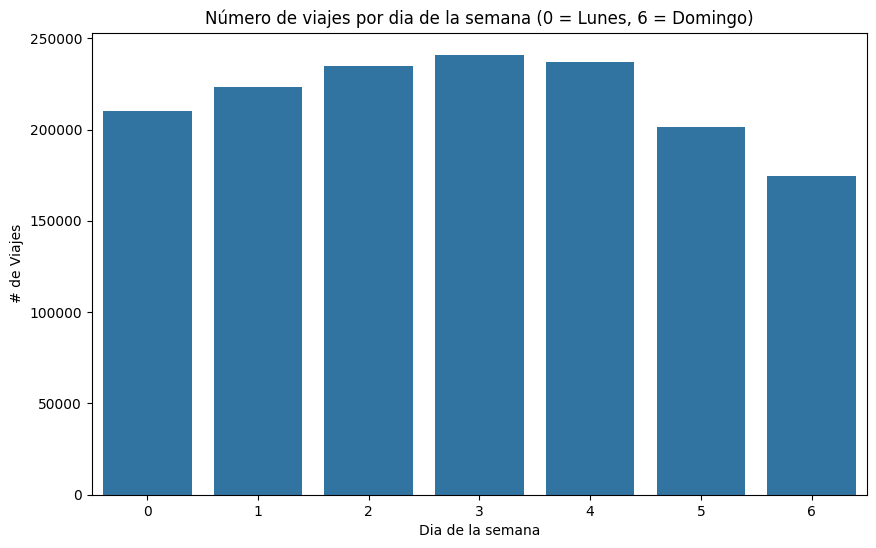

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data=green_sample_22_23,x='PU_dia_semana')
plt.title('Número de viajes por dia de la semana (0 = Lunes, 6 = Domingo)') 
plt.xlabel('Dia de la semana')
plt.ylabel('# de Viajes')
plt.show()

## De las anteriores graficas se observa que el comportemiento es en general bastante homogeneo, a excepcion de la hora del dia, donde ahora veremos si a traves del tiempo se repite ese comportamiendo, es decir, si se observa estacionalidad:

In [24]:
trip_counts.columns

Index(['PU_año', 'PU_mes', 'PU_dia', 'PU_hora', 'PU_dia_semana', 'Count'], dtype='object')

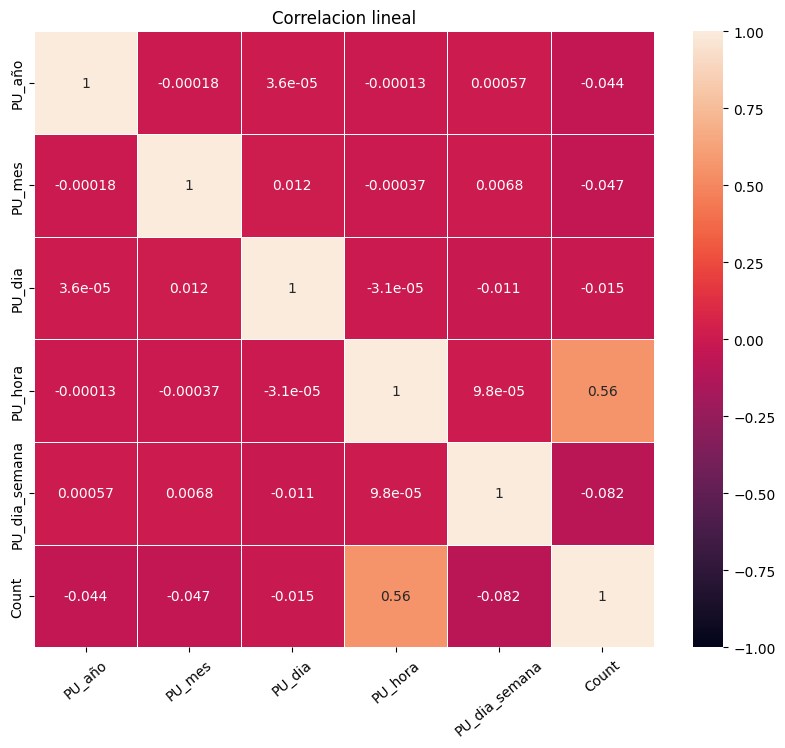

In [25]:
time_corr = trip_counts[['PU_año', 'PU_mes', 'PU_dia', 'PU_hora', 'PU_dia_semana', 'Count']].corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(time_corr, annot=True, linewidth=.5, vmin=-1)
plt.title('Correlacion lineal') 
plt.xticks(rotation=40)
plt.show()

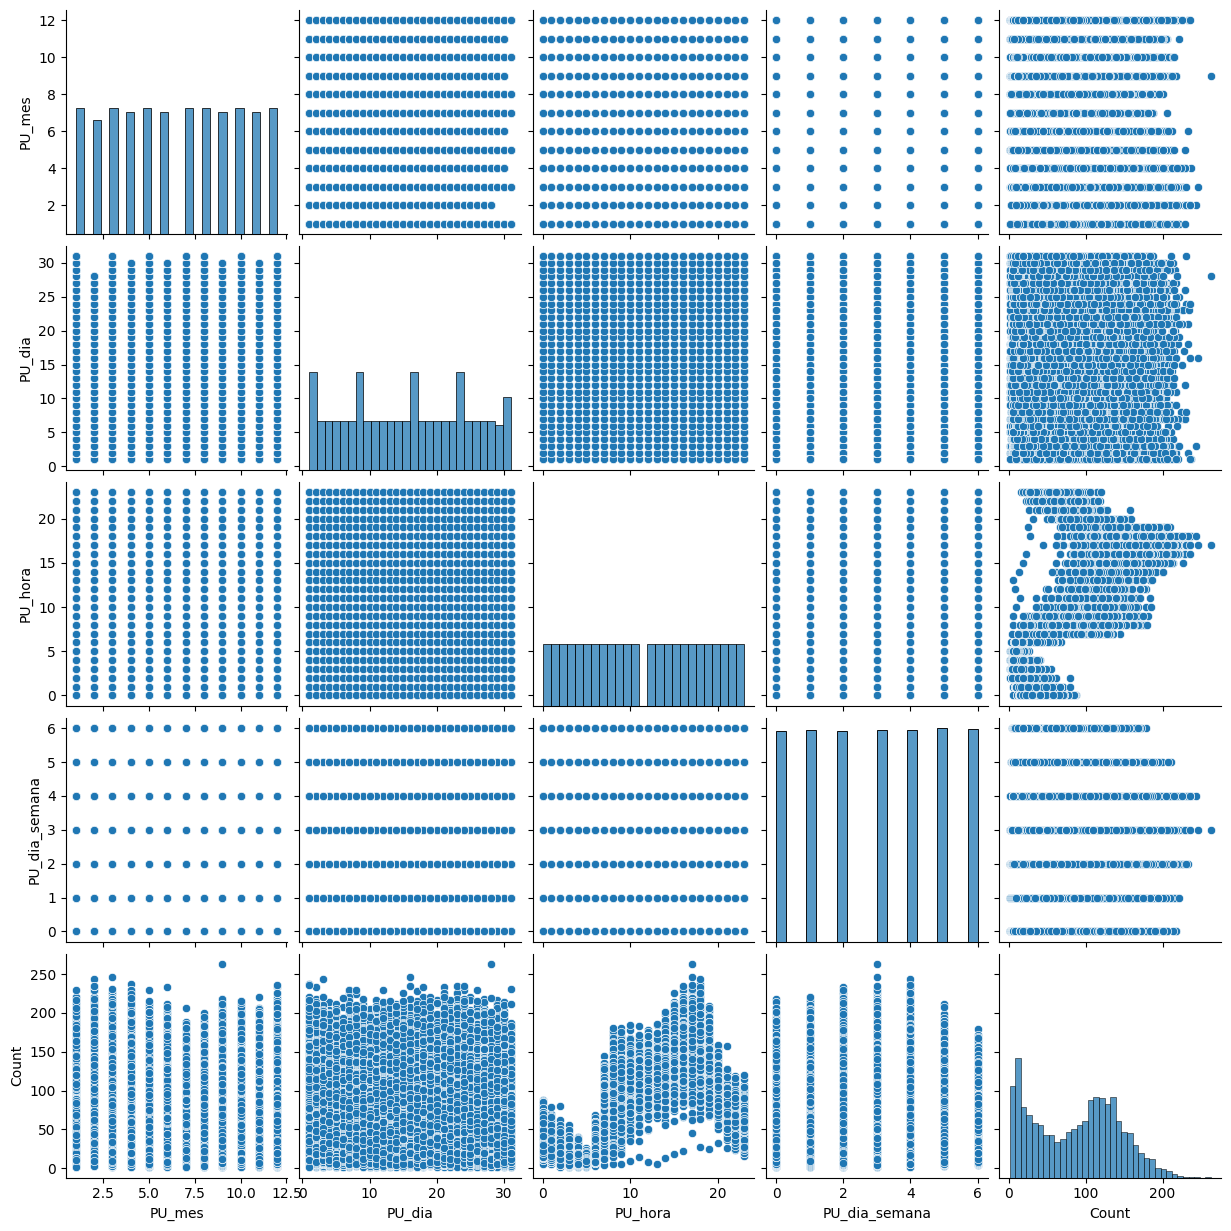

In [26]:
sns.pairplot(trip_counts.drop('PU_año', axis=1)) # Solo hay 2 años, asi que este valor no aporta mucho
plt.show()

## Procederemos a unificar año, mes, dia, y hora, para obtener una unica fecha por hora

In [27]:
trip_counts['datetime_hour'] = pd.to_datetime({'year':trip_counts['PU_año'], 'month': trip_counts['PU_mes'], 'day': trip_counts['PU_dia'], 'hour':trip_counts['PU_hora']})

In [28]:
trip_counts.head(5)

,PU_año,PU_mes,PU_dia,PU_hora,PU_dia_semana,Count,datetime_hour
0,2022,1,1,0,5,72,2022-01-01 00:00:00
1,2022,1,1,1,5,70,2022-01-01 01:00:00
2,2022,1,1,2,5,62,2022-01-01 02:00:00
3,2022,1,1,3,5,40,2022-01-01 03:00:00
4,2022,1,1,4,5,21,2022-01-01 04:00:00


In [29]:
lite_trip_counts = trip_counts[['datetime_hour','Count']].copy()
lite_trip_counts

,datetime_hour,Count
0,2022-01-01 00:00:00,72
1,2022-01-01 01:00:00,70
2,2022-01-01 02:00:00,62
3,2022-01-01 03:00:00,40
4,2022-01-01 04:00:00,21
...,...,...
17511,2023-12-31 19:00:00,91
17512,2023-12-31 20:00:00,80
17513,2023-12-31 21:00:00,83
17514,2023-12-31 22:00:00,68


## A continuacion se graficara el comportamiento por hora durante el periodo de 2 años del numero de viajes por hora.

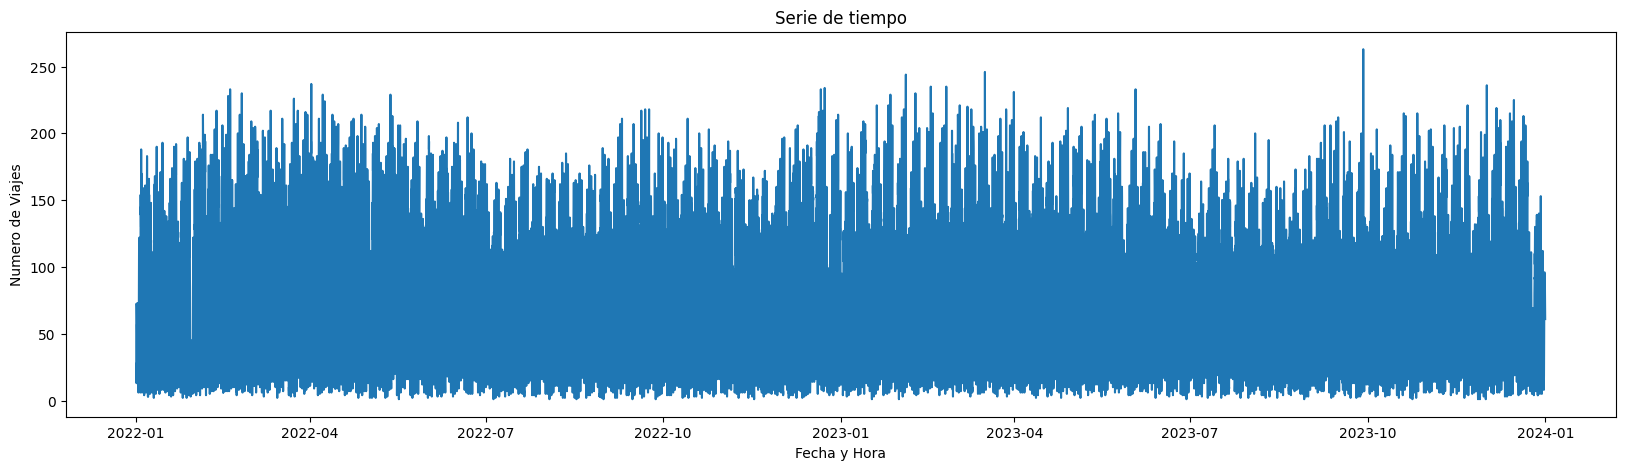

In [30]:
plt.figure(figsize = (20,5))

plt.plot(lite_trip_counts['datetime_hour'], lite_trip_counts['Count'])
plt.title('Serie de tiempo') 
plt.xlabel('Fecha y Hora')
plt.ylabel('Numero de Viajes')
plt.show()

### Es bastante dificil de ver algun tipo de estacionalidad, por lo que se tomara solo un año para observar mejor

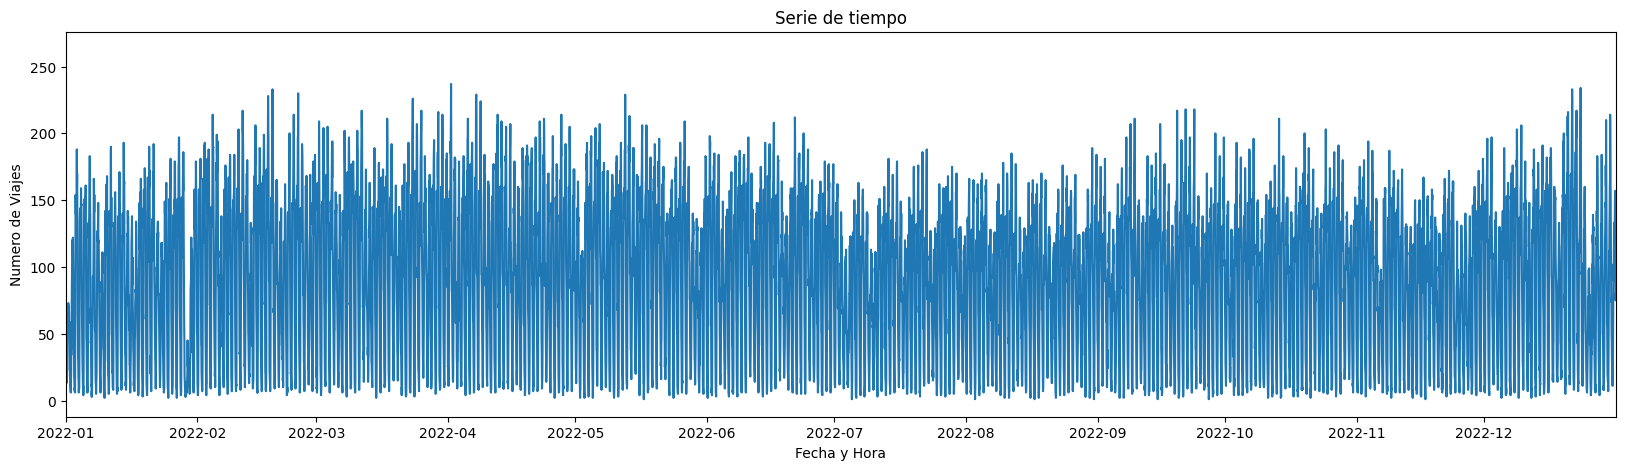

In [31]:
plt.figure(figsize = (20,5))

plt.plot(lite_trip_counts['datetime_hour'], lite_trip_counts['Count'])
plt.title('Serie de tiempo') 
plt.xlabel('Fecha y Hora')
plt.ylabel('Numero de Viajes')
plt.xlim(pd.to_datetime('2022-01-01 00:00:00'), pd.to_datetime('2022-12-31 23:00:00'))
plt.show()

### Se ven unas pequeñas separaciones, pero igual de dificil ver el patron. Tomaremos 3 meses ahora:

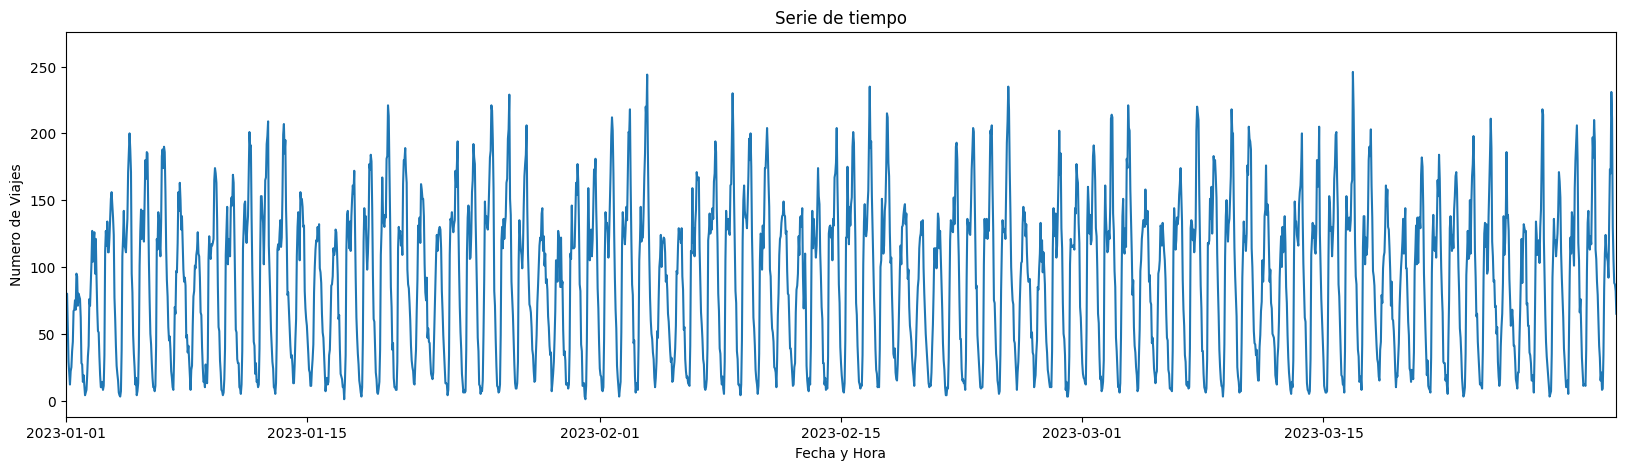

In [32]:
plt.figure(figsize = (20,5))

plt.plot(lite_trip_counts['datetime_hour'], lite_trip_counts['Count'])
plt.title('Serie de tiempo') 
plt.xlabel('Fecha y Hora')
plt.ylabel('Numero de Viajes')
plt.xlim(pd.to_datetime('2023-01-01 00:00:00'), pd.to_datetime('2023-03-31 23:00:00'))
plt.show()

### Se comienza a ver mas claramente el patron. Los proximos graficos seran de un mes y una semana respectivamente:

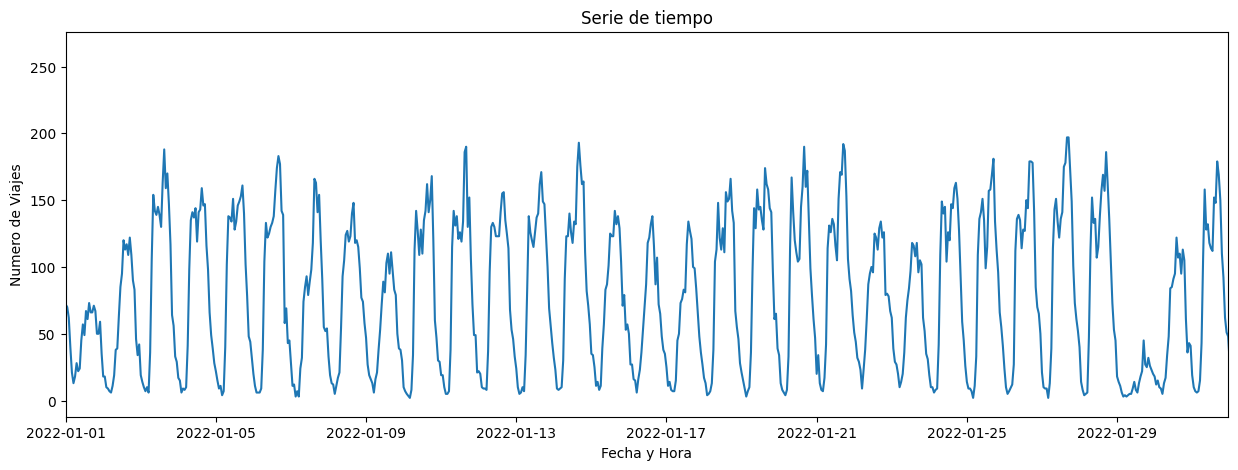

In [33]:
plt.figure(figsize = (15,5))

plt.plot(lite_trip_counts['datetime_hour'], lite_trip_counts['Count'])
plt.title('Serie de tiempo') 
plt.xlabel('Fecha y Hora')
plt.ylabel('Numero de Viajes')
plt.xlim(pd.to_datetime('2022-01-01 00:00:00'), pd.to_datetime('2022-01-31 23:00:00'))
plt.show()

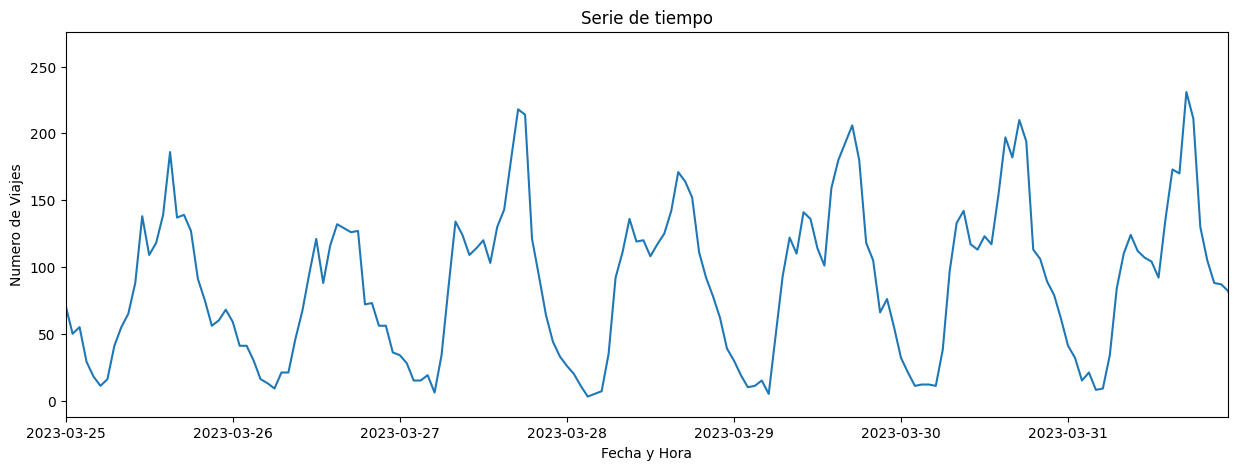

In [34]:
plt.figure(figsize = (15,5))

plt.plot(lite_trip_counts['datetime_hour'], lite_trip_counts['Count'])
plt.title('Serie de tiempo') 
plt.xlabel('Fecha y Hora')
plt.ylabel('Numero de Viajes')
plt.xlim(pd.to_datetime('2023-03-25 00:00:00'), pd.to_datetime('2023-03-31 23:00:00'))
plt.show()

### Se ve que existe una estacionalidad alrededor de las horas del dia, la cual se puede y debe usar a la hora de realizar las predicciones del producto ML. Para el MVP se sugiere usar los borough y probar las predicciones para luego avanzar en los `PULocationID` de manera mas precisa.